In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(reshape2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [3]:
df <- read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
head(df,10)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8
0,1,0,1,30,1,0,0,0,0,⋯,1,0,3,0,14,0,0,9,6,7
0,1,1,1,25,1,0,0,1,0,⋯,1,0,3,0,0,1,0,11,4,4
2,1,1,1,30,1,0,1,0,1,⋯,1,0,5,30,30,1,0,9,5,1


In [4]:
str(df)

spc_tbl_ [253,680 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Diabetes_012        : num [1:253680] 0 0 0 0 0 0 0 0 2 0 ...
 $ HighBP              : num [1:253680] 1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : num [1:253680] 1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : num [1:253680] 1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num [1:253680] 40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : num [1:253680] 1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : num [1:253680] 0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num [1:253680] 0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : num [1:253680] 0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : num [1:253680] 0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : num [1:253680] 1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : num [1:253680] 0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num [1:253680] 1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num [1:253680] 0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : num [

In [7]:
# Check for duplicated rows
sum(duplicated(df))

[1] 23899

In [9]:
# Count unique values in each column
print(sapply(df, n_distinct))

        Diabetes_012               HighBP             HighChol 
                   3                    2                    2 
           CholCheck                  BMI               Smoker 
                   2                   84                    2 
              Stroke HeartDiseaseorAttack         PhysActivity 
                   2                    2                    2 
              Fruits              Veggies    HvyAlcoholConsump 
                   2                    2                    2 
       AnyHealthcare          NoDocbcCost              GenHlth 
                   2                    2                    5 
            MentHlth             PhysHlth             DiffWalk 
                  31                   31                    2 
                 Sex                  Age            Education 
                   2                   13                    6 
              Income 
                   8 


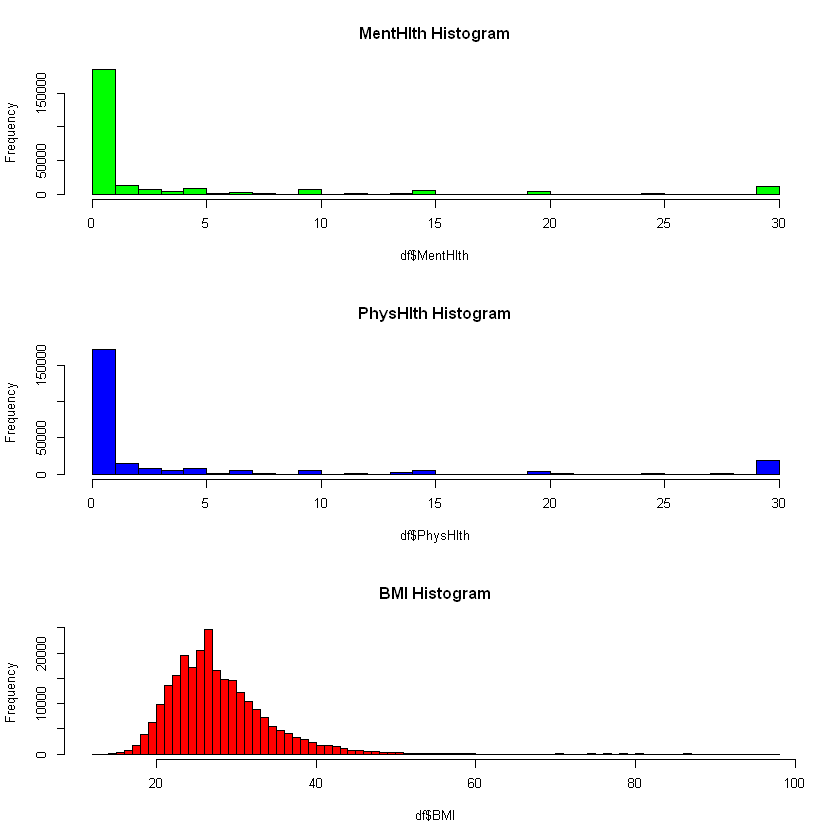

In [11]:
# Plot histograms for quantitative variables
par(mfrow=c(3,1), bg='white')
hist(df$MentHlth, breaks=31, col='green', main='MentHlth Histogram')
hist(df$PhysHlth, breaks=31, col='blue', main='PhysHlth Histogram')
hist(df$BMI, breaks=84, col='red', main='BMI Histogram')

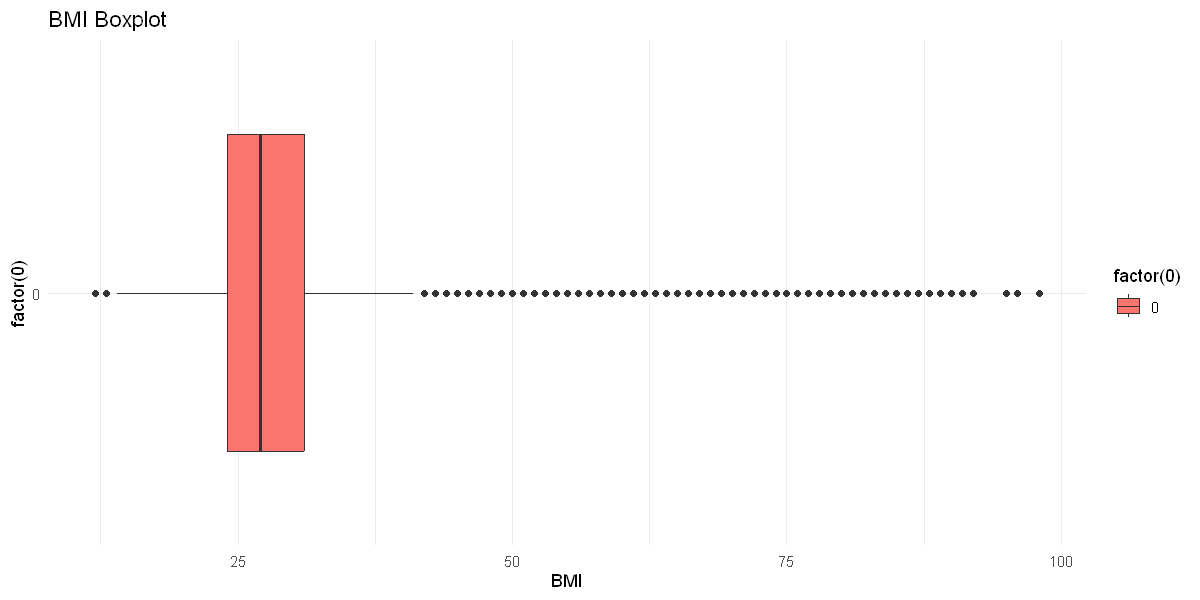

In [25]:
# Increase the width of the plot
options(repr.plot.width=10, repr.plot.height=5)

# Boxplot for BMI with horizontal axis
ggplot(df, aes(x = factor(0), y = BMI, fill= factor(0))) + 
    geom_boxplot() + 
    labs(title = "BMI Boxplot") + 
    theme_minimal() + 
    coord_flip()

In [14]:
# summary for BMI
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

In [15]:
# Frequency plots for categorical variables
df2 <- df %>% select(-BMI, -MentHlth, -PhysHlth)

# Reshape data for plotting
df2_melt <- melt(df2)

No id variables; using all as measure variables



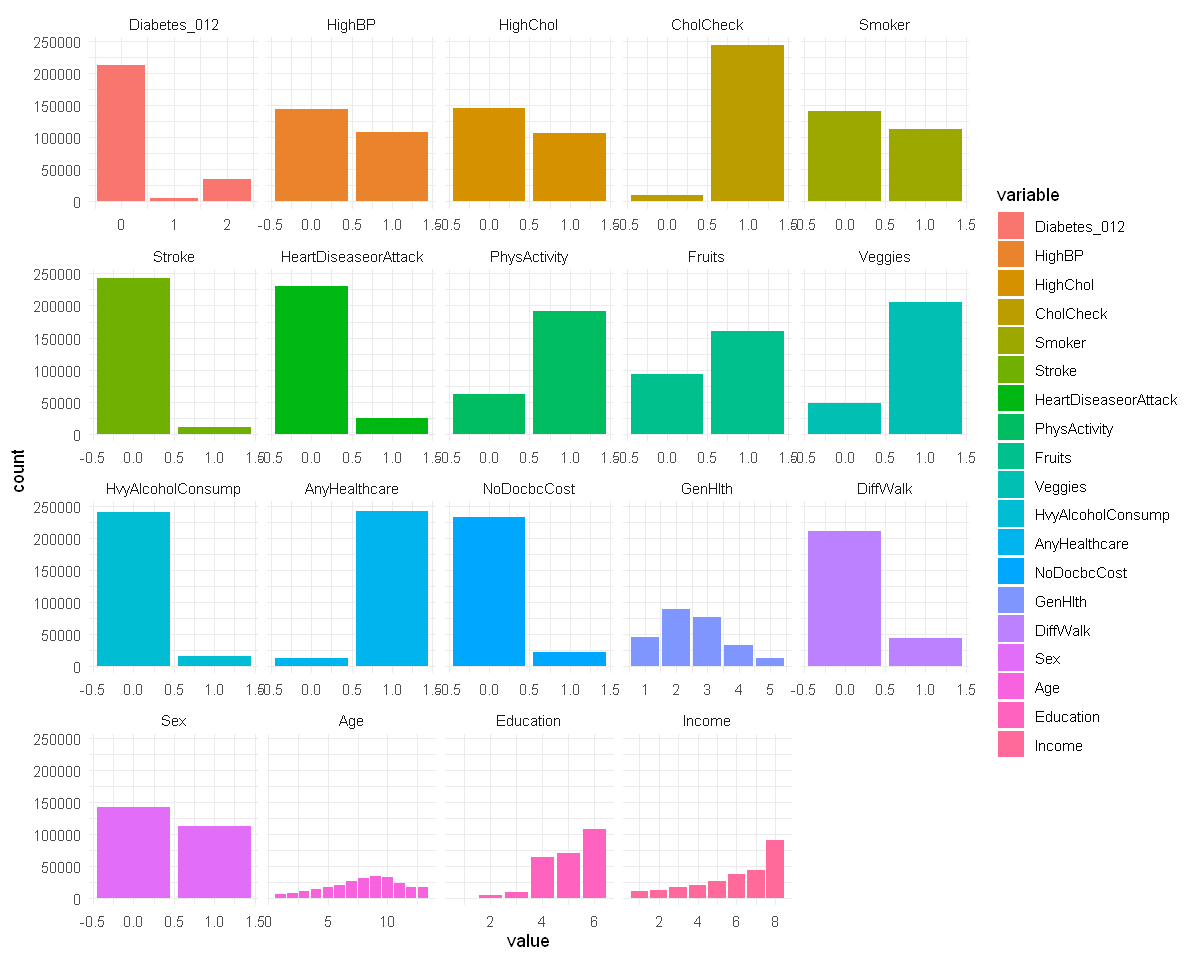

In [21]:
# Increase the width of the plot
options(repr.plot.width=10, repr.plot.height=8)

# Plot frequency for each categorical variable
ggplot(df2_melt, aes(x = value, fill = variable)) + 
    geom_bar() + 
    facet_wrap(~variable, scales = 'free_x') + 
    theme_minimal()

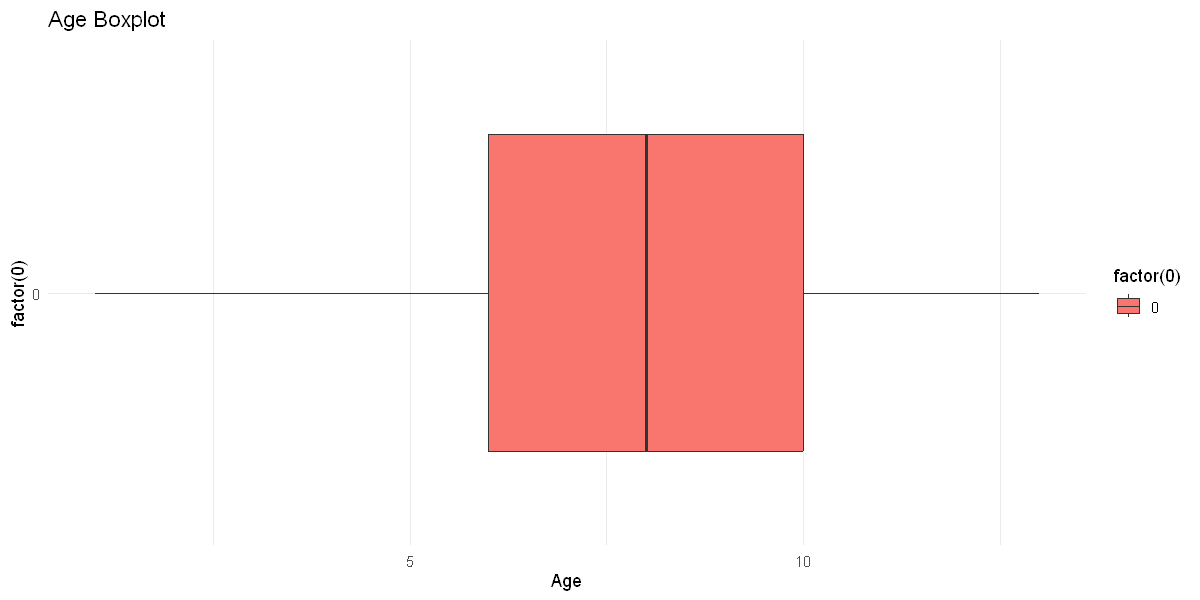

In [24]:
options(repr.plot.width=10, repr.plot.height=5)

# Boxplot for Age with color
ggplot(df, aes(x = factor(0), y = Age, fill = factor(0))) + 
  geom_boxplot() + 
  labs(title = "Age Boxplot") + 
  theme_minimal() +
  coord_flip()

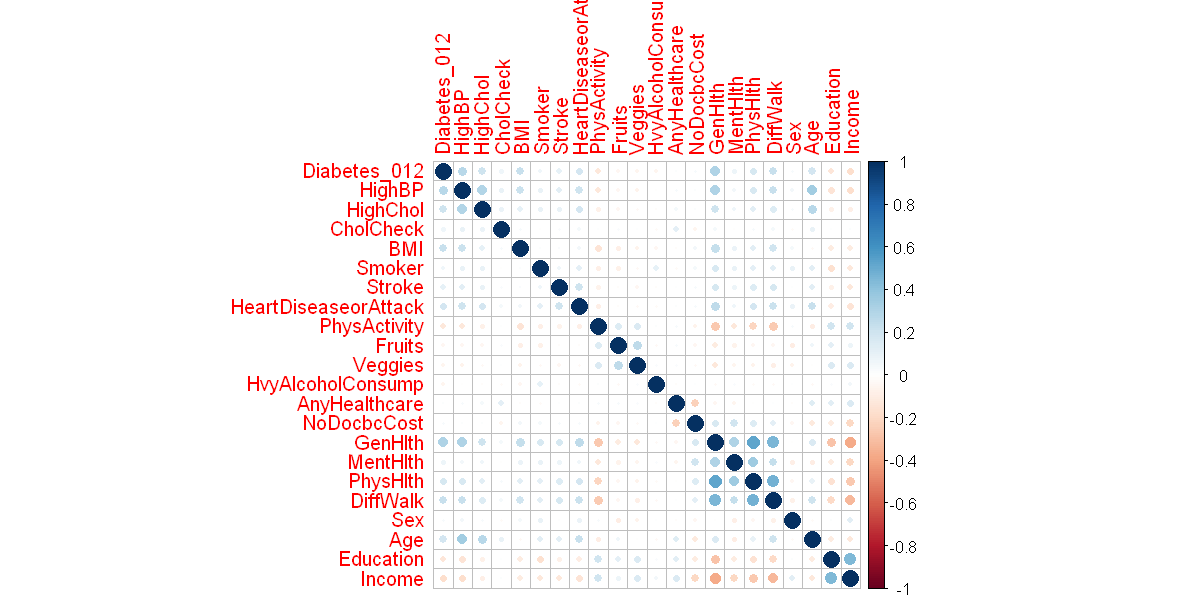

In [31]:
library(corrplot)
# Correlation matrix
corr <- cor(df, use = "complete.obs")
corrplot(corr)

#### Summary

1 số biến có tương quan với nhau => có thể dẫn đến đa cộng tuyến, cần có quá trình lựa chọn biến cho mô hình hồi quy

giả định về mức sống và lối sống của các quan sát quyết định có khả năng mắc bệnh tiểu đường hay không. (không bao gồm các yếu tố bệnh lí huyết áp cao, cholesterol cao, hút thuốc và giới tính)

dữ liệu về số lượng người mắc bệnh tiểu đường và không mắc bệnh không cân bằng => xử lí imbalanced data 
